In [92]:
import pandas as pd
import numpy as np

In [93]:
print(pd.__version__)
print(np.__version__)

2.3.3
2.4.1


In [94]:
df = pd.read_csv("../data/car_data.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [95]:
df.shape

(4340, 8)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [97]:
df["brand"] = df["name"].str.split().str[0]

df["brand"].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [98]:
df = df.drop("name" , axis = 1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   brand          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [100]:
df.duplicated().sum()

np.int64(790)

In [101]:
df.drop_duplicates(inplace=True)

print(df.duplicated().sum())

print(df.shape)

0
(3550, 8)


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3550 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3550 non-null   int64 
 1   selling_price  3550 non-null   int64 
 2   km_driven      3550 non-null   int64 
 3   fuel           3550 non-null   object
 4   seller_type    3550 non-null   object
 5   transmission   3550 non-null   object
 6   owner          3550 non-null   object
 7   brand          3550 non-null   object
dtypes: int64(3), object(5)
memory usage: 249.6+ KB


Pipeline:

Numeric Column : null values + Standard Scalar

Categorical Column : null values + One Hot Encoding

Column Transformer : Numeric + Categorical

pipeline : Column Trasformer + Model

In [103]:
num_col = ["year"  , "km_driven"]
cat_col = ["fuel" , "seller_type" , "brand" , "transmission" , "owner"]

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_trans = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy="mean")),
    ("scalar" , StandardScaler())
])



In [105]:
cat_trans = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy="most_frequent")),
    ("oneencoder" , OneHotEncoder(handle_unknown='ignore'))
])
cat_trans

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('oneencoder', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'most_frequent'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputat

In [106]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_col),      
        ('cat', cat_trans, cat_col) 
    ]
)

preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [107]:
from sklearn.linear_model import LinearRegression

pipe = Pipeline(steps=[
    ("column_trsnformer" , preprocessor),
    ("model" , LinearRegression())
])

pipe

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('column_trsnformer', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [108]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3550 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3550 non-null   int64 
 1   selling_price  3550 non-null   int64 
 2   km_driven      3550 non-null   int64 
 3   fuel           3550 non-null   object
 4   seller_type    3550 non-null   object
 5   transmission   3550 non-null   object
 6   owner          3550 non-null   object
 7   brand          3550 non-null   object
dtypes: int64(3), object(5)
memory usage: 249.6+ KB


In [109]:
y = df["selling_price"]
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4334    600000
4335    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3550, dtype: int64

In [110]:
x = df.drop("selling_price" ,axis=1)
x

,year,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...
4334,2012,170000,Diesel,Individual,Manual,First Owner,Toyota
4335,2014,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [111]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)


In [112]:
pipe.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('column_trsnformer', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [113]:
y_lr_pred = pipe.predict(x_test)
y_lr_pred

array([ 1.63814792e+05,  8.56035935e+05,  7.05524719e+05,  8.82328254e+05,
        7.19967416e+04,  8.28353629e+05,  9.65602148e+05,  4.44219652e+05,
        7.49563429e+05,  3.01171004e+05,  4.16278469e+05,  3.40672954e+05,
        5.29797613e+05,  3.46723415e+05,  8.90818464e+05,  1.89834603e+05,
       -2.02458065e+05,  1.85119598e+05,  5.50381724e+05,  4.50120772e+05,
        5.88634121e+05,  2.29946642e+06,  2.98317864e+05,  2.69556628e+05,
        3.12628497e+05,  4.06470434e+05,  5.08892343e+05,  2.87752529e+05,
        1.44545053e+05,  4.54758892e+05,  2.88415661e+05,  8.14267940e+04,
        4.63993082e+05,  5.29310988e+05,  7.52781349e+05,  3.84283127e+05,
        5.07232661e+05,  7.22376147e+05,  3.17359627e+05,  6.70899813e+05,
        4.64268800e+05,  6.37370553e+05,  6.56232489e+05,  6.72061745e+05,
        5.06959515e+05,  7.30575345e+05,  1.74219622e+05,  1.60247555e+05,
        6.93753615e+05,  7.02134963e+04,  4.53288919e+05, -2.78384738e+04,
        2.70135444e+05,  

In [114]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_test, y_lr_pred)
print("rms: ", rms)

rms:  357707.6095553779


In [115]:
# 1. Compare error to the average price
print("Average Car Price:", y_test.mean())

# 2. Check the R2 Score (Accuracy percentage)
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, y_lr_pred))

Average Car Price: 495827.0084507042
R2 Score: 0.6210225200004837


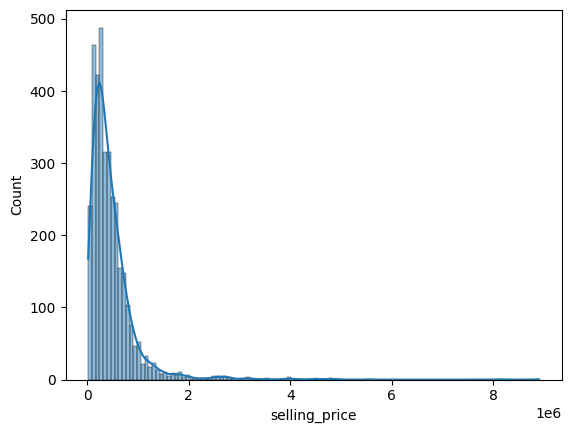

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['selling_price'], kde=True)
plt.show()

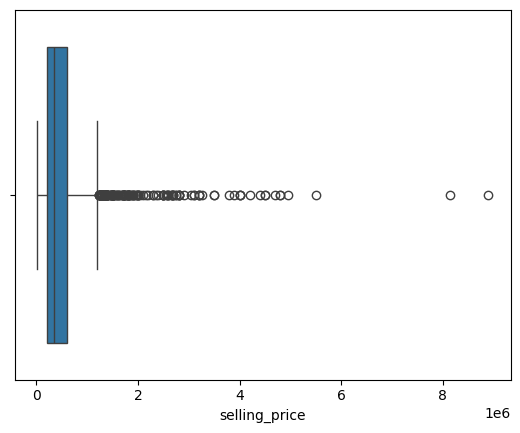

In [117]:
sns.boxplot(x=df['selling_price'])
plt.show()

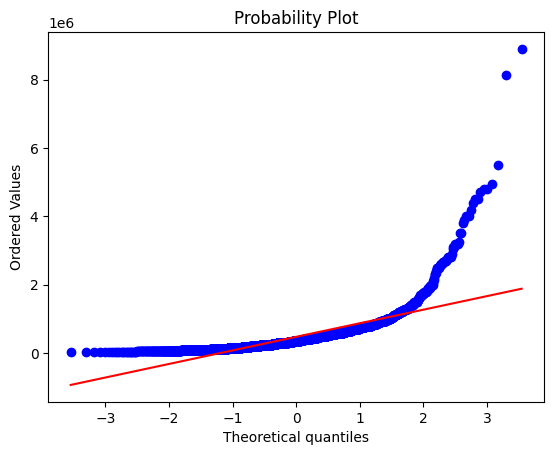

In [118]:
import scipy.stats as stats

stats.probplot(df['selling_price'], dist="norm", plot=plt)
plt.show()

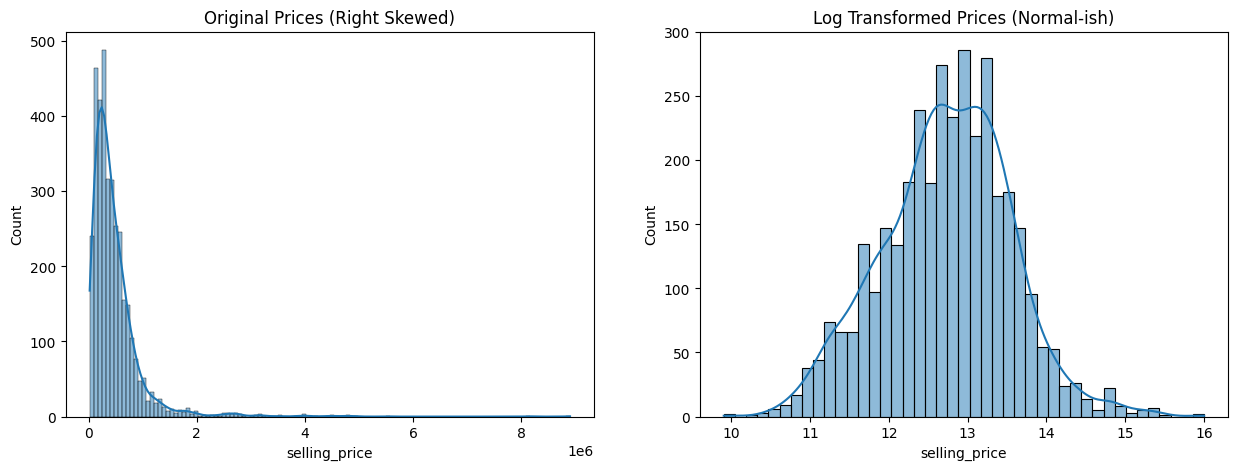

In [119]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_log = np.log(y)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y, kde=True, ax=axes[0])
axes[0].set_title("Original Prices (Right Skewed)")

sns.histplot(y_log, kde=True, ax=axes[1])
axes[1].set_title("Log Transformed Prices (Normal-ish)")

plt.show()

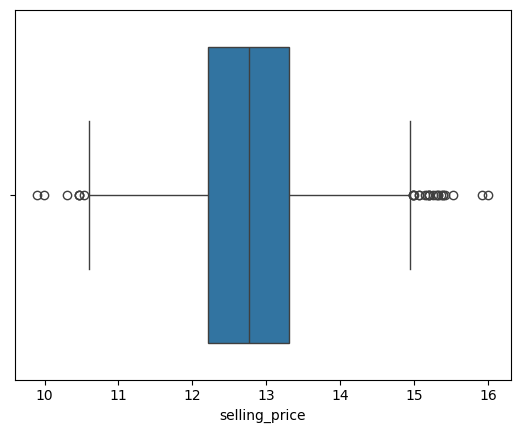

In [120]:
sns.boxplot(x=y_log)
plt.show()

In [121]:

X_train, X_test, y_train_log, y_test_log = train_test_split(x, y_log, test_size=0.2, random_state=42)

pipe.fit(X_train, y_train_log)

y_pred_log = pipe.predict(X_test)

y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test_log)

print("NEw RMS: ", root_mean_squared_error(y_test_original , y_pred))
print("New R2 Score:", r2_score(y_test_original, y_pred))

NEw RMS:  276731.7831394409
New R2 Score: 0.7731832472365454


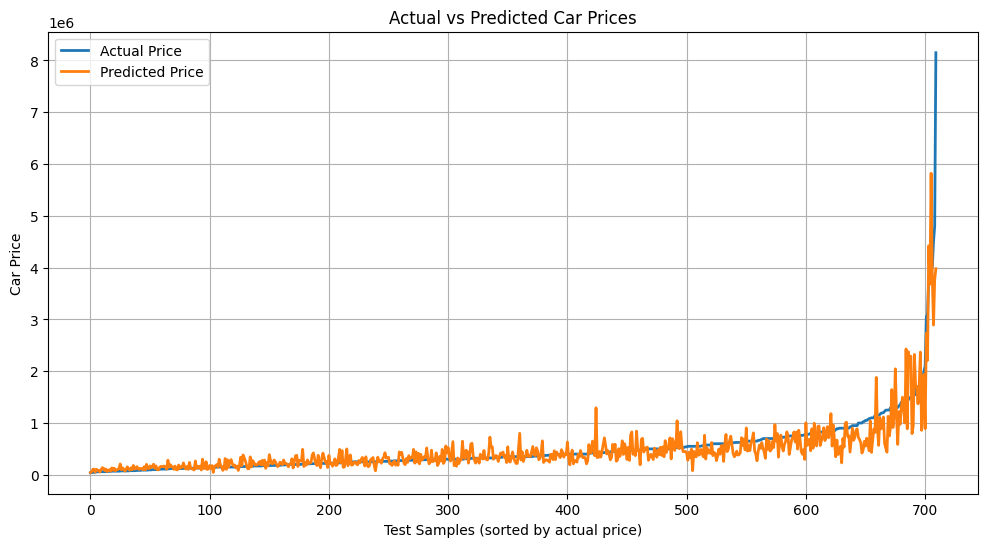

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy arrays
y_test_arr = np.array(y_test_original)
y_pred_arr = np.array(y_pred)

# Sort by actual values
sorted_idx = np.argsort(y_test_arr)
y_test_sorted = y_test_arr[sorted_idx]
y_pred_sorted = y_pred_arr[sorted_idx]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Price", linewidth=2)
plt.plot(y_pred_sorted, label="Predicted Price", linewidth=2)

plt.xlabel("Test Samples (sorted by actual price)")
plt.ylabel("Car Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.grid(True)

plt.show()


In [123]:

from sklearn.ensemble import RandomForestRegressor

pipe2 = Pipeline(steps=[
    ("column_trsnformer" , preprocessor),
    ("model2" , RandomForestRegressor(n_estimators=100,
                              random_state=3))
])
pipe2.fit(X_train , y_train_log)

y_rf_pred_log = pipe2.predict(X_test)

y_pred_rf = np.exp(y_rf_pred_log)

y_test_original_rf = np.exp(y_test_log)

print("NEw RMS: ", root_mean_squared_error(y_test_original_rf , y_pred_rf))
print("New R2 Score:", r2_score(y_test_original_rf, y_pred_rf))

#

NEw RMS:  333387.7497638455
New R2 Score: 0.6708026571805752


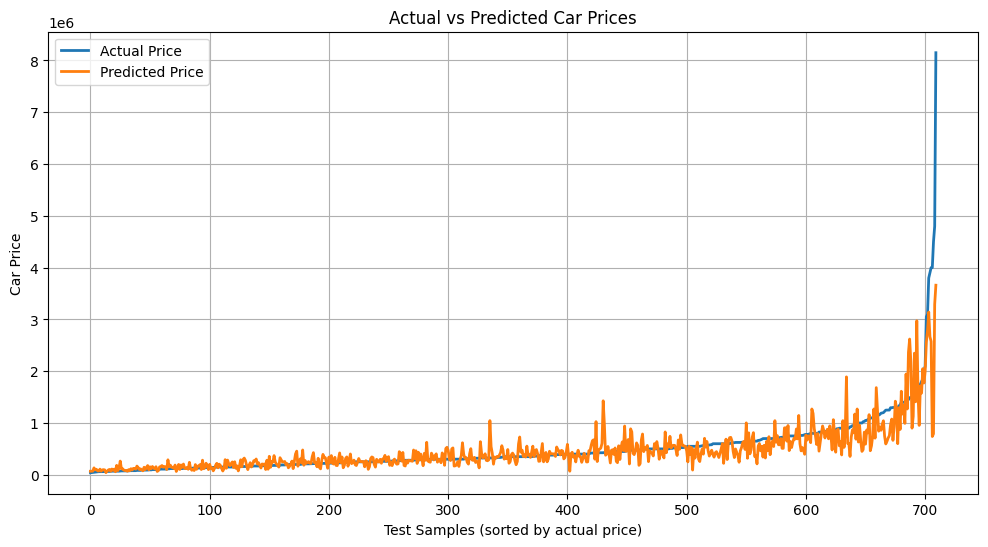

In [124]:
y_test_arr = np.array(y_test_original)
y_pred_arr = np.array(y_pred_rf)

# Sort by actual values
sorted_idx = np.argsort(y_test_arr)
y_test_sorted = y_test_arr[sorted_idx]
y_pred_sorted = y_pred_arr[sorted_idx]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Price", linewidth=2)
plt.plot(y_pred_sorted, label="Predicted Price", linewidth=2)

plt.xlabel("Test Samples (sorted by actual price)")
plt.ylabel("Car Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.grid(True)

plt.show()

In [125]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# 1. Define the two models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Create the Voting Regressor (it averages the results)
voting = VotingRegressor([('lr', lr), ('rf', rf)])

# 3. Create a new pipeline with the Voting model
# Note: We use the same step1 (transformer) you defined earlier
pipe = Pipeline([
    ("column_trsnformer" , preprocessor),
    ('step2', voting)
])

# 4. Train on LOGGED data
pipe.fit(X_train, y_train_log)

# 5. Predict & Evaluate
y_pred_log = pipe.predict(X_test)

y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test_log)

print("Voting R2 Score:", r2_score(y_test_original, y_pred))
print("Voting RMSE:", root_mean_squared_error(y_test_original, y_pred))

Voting R2 Score: 0.7434764975639676
Voting RMSE: 294296.47324598196
